<a href="https://colab.research.google.com/github/jjonhwa/DeepLearning.AI-TensorFlow/blob/main/20_Course_3_Week_3_Lesson_1c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.4.0


In [2]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info = True, as_supervised = True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteY0QJIY/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteY0QJIY/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteY0QJIY/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer = info.features['text'].encoder

In [4]:
Buffer_size = 10000
Batch_size = 64

train_dataset = train_dataset.shuffle(Buffer_size)
train_dataset = train_dataset.padded_batch(Batch_size, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(Batch_size, tf.compat.v1.data.get_output_shapes(test_dataset))

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.summary()

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [6]:
num_epochs = 10
history = model.fit(
    train_dataset,
    epochs = num_epochs,
    validation_data = test_dataset
)

Epoch 1/10
391/391 [==============================] - 30s 59ms/step - loss: 0.5821 - acc: 0.6496 - val_loss: 0.3166 - val_acc: 0.8741
Epoch 2/10
391/391 [==============================] - 17s 41ms/step - loss: 0.2353 - acc: 0.9123 - val_loss: 0.2985 - val_acc: 0.8789
Epoch 3/10
391/391 [==============================] - 16s 40ms/step - loss: 0.1686 - acc: 0.9403 - val_loss: 0.3228 - val_acc: 0.8720
Epoch 4/10
391/391 [==============================] - 16s 39ms/step - loss: 0.1408 - acc: 0.9492 - val_loss: 0.3496 - val_acc: 0.8697
Epoch 5/10
391/391 [==============================] - 15s 38ms/step - loss: 0.1126 - acc: 0.9627 - val_loss: 0.4206 - val_acc: 0.8640
Epoch 6/10
391/391 [==============================] - 15s 37ms/step - loss: 0.0856 - acc: 0.9730 - val_loss: 0.4344 - val_acc: 0.8601
Epoch 7/10
391/391 [==============================] - 16s 38ms/step - loss: 0.0695 - acc: 0.9794 - val_loss: 0.5454 - val_acc: 0.8590
Epoch 8/10
391/391 [==============================] - 15s 36ms

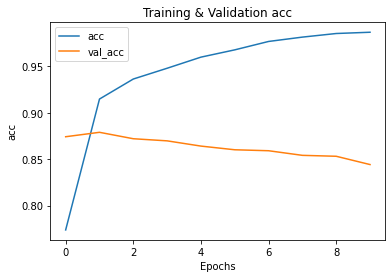

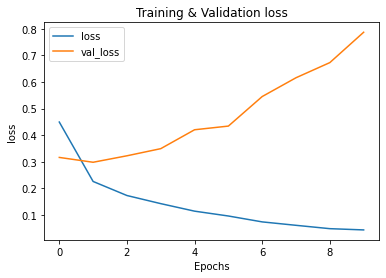

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_graphs(history, string) :
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.title('Training & Validation {}'.format(string))
  plt.show()

plot_graphs(history, 'acc')
plot_graphs(history, 'loss')